26.743719162591436


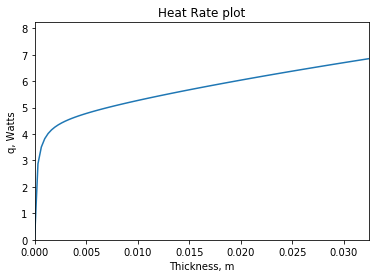

In [81]:
import numpy as np
import matplotlib.pyplot as plt

#Calculate Reynolds number from Free stream velocity(U), kinematic viscosity (v), and characteristic length
def Re(U,nu,L):
    return U * L / nu

#Calculate Prandtl Number 
def Pr(mu,Cp,k):
    return mu * Cp / k

#kinematic viscosity from density (rho) and dynamic viscosity (mu)
def nu(rho,mu):
    return mu / rho

def mu(rho,nu):
    return nu * rho

#Calculate Nusselt Number over isothermal plate: the dimensionless heat transfer coefficient
# Equation 1.52,1.57
def NusseltPlate(h,L,kf,Re,Pr):
    if h*L*kf == 0 and Re*Pr == 0:
        raise TypeError('Incorrect use of Nu() function: Type FunctionHelp() or th.FunctionHelp() for help on how to use this function')   
    elif h*L*kf != 0:
        output = h * L / kf 
    else:
        if Re < 5000:
            if Pr <= 0.6:
                raise TypeError('This function uses correlations that expect your Prandlt Number to be greater than 0.6')
            else:
                output = 0.664*Re**(0.5)*Pr**(1/3)
        elif Re < 10**8:
            if Pr <= 0.6 or Pr >= 60:
                raise TypeError('This function uses correlations that expect 0.6<=Pr<=60')
            else:
                output = 0.037*Re**(0.8)*Pr**(1/3)                
        else:
                raise TypeError('This function uses correlations that expect your Reynolds Number to be less than 10^8')     
    return output


#ALL IN SI UNITS
t = 3.28*10**(-5) #initial thickness of plate
U = 1.5 #free stream velocity of air flowing over plate
k_al = 237 #thermal conductivity of aluminum
k_air = 0.0283 #thermal conductivity of air
Prt = 0.703 #Prandtl number
nu = 23.42 * 10**(-6) #kinematic viscosity of air
L = 2.5*10**(-2) #Width of fin
b = 5.4*10**(-2) # Extrusion length of fin

h = k_air/L*NusseltPlate(0,0,k_air,Re(U,nu,L),Prt)
print(h)

Tb = 85
Tamb = 22
theta_b = Tb-Tamb

#initialize some arrays which will store thickness and heat rate
n = 100
tA = np.zeros(n)
qA = np.zeros(n)

for i in range(1,n):
    tA[i] = t0*i
    #print(tA[i])
    V = b*tA[i]*L #Volume of fin
    mb = V/(L)*(2*h/k_al/(tA[i])**3)**0.5
    a = (h*2*(L+tA[i])*k_al*L*tA[i])**(0.5)*theta_b
    qA[i] = a*np.tanh(mb) #heat rate
    #print(qA[i])

plt.plot(tA,qA)
plt.title('Heat Rate plot')
plt.ylabel('q, Watts')
plt.xlabel('Thickness, m')
plt.axis([0, max(tA), 0, 1.2*max(qA)])
plt.show()